<a href="https://colab.research.google.com/github/ijinshes2ly/LogisticRegression/blob/main/GM_D26_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모델 정확도: 1.00
AUC 점수: 1.00
혼동 행렬:
[[1 0]
 [0 3]]
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



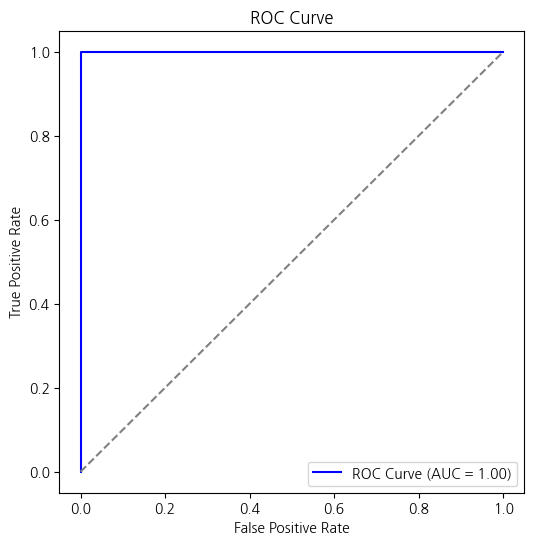

In [17]:
#광고 캠페인 전환율 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# 가상의 고객 데이터 생성
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'income': [3000, 6000, 3200, 5000, 7200, 6500, 4000, 5800, 7000, 3100,
               4800, 5500, 3900, 6200, 7500, 6700, 3500, 5600, 7100, 4200],
    'browsing_time': [5, 15, 7, 10, 20, 13, 8, 12, 18, 6, 9, 11, 8, 14, 21, 17, 7, 11, 19, 10],
    'num_clicks': [1, 5, 2, 3, 6, 4, 2, 3, 5, 1, 3, 4, 2, 4, 6, 5, 2, 3, 5, 2],
    'ad_exposure': [2, 6, 3, 5, 8, 7, 4, 6, 8, 3, 5, 6, 4, 7, 9, 7, 4, 6, 8, 5],
    'converted': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# 데이터 분할 (독립변수 X, 종속변수 y)
X = df[['age', 'income', 'browsing_time', 'num_clicks', 'ad_exposure']]
y = df['converted']

# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (로지스틱 회귀는 입력 스케일에 민감)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f"모델 정확도: {accuracy:.2f}")
print(f"AUC 점수: {auc_score:.2f}")
print("혼동 행렬:")
print(conf_matrix)
print("분류 보고서:")
print(report)

from sklearn.metrics import roc_curve

# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


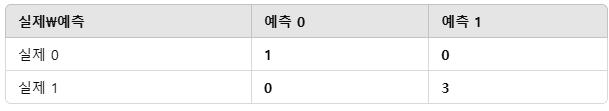

* 정확도가 100%로 모델이 테스트 데이터를 완벽하게 분류했음.
* ROC커브의 아래 면적인 ACU가 1로 클래스 0과 클래스 1을 완벅하게 구분함.모델의 예측 확률을 충분히 신뢰할 수 있음.
* * 혼동행렬 결과, 구매전환으로 예상했을 때 실제 구매전환으로 분류된 TP는 3개.
* 구매로 예상했지만 비구매로 분류된 FN은 0개.
* 비구매로 예상하고 비구매로 분류 TN은 1개.
* 비구매로 예상했지만 구매로 분류된 FP는 0개.
* 정답을 올바르게 분류했기때문에 정확도는 100%임.
* 각각의 클래스의 정밀도,재현율,F1점수가 모두 1로, 정확하게 분류고, 정확하게 예측함.
*ROC커브는 모든 양성 샘플을 올바르게 예측하면서 음성 샘플도 전혀 틀리지 않음.

모델 정확도: 1.00
AUC 점수: 1.00
혼동 행렬:
[[1 0]
 [0 3]]
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



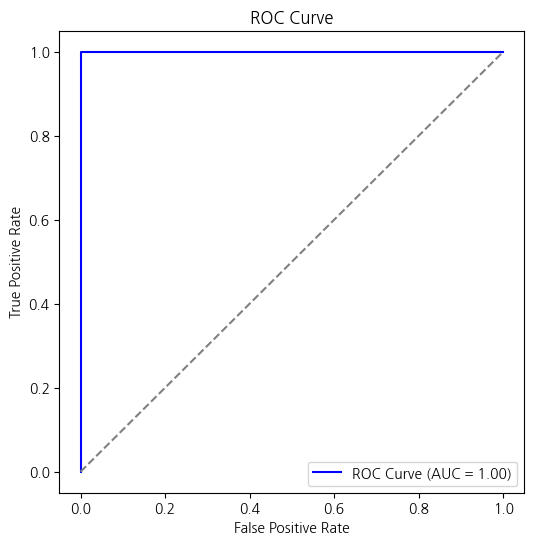

In [14]:
#이메일 마케팅 캠페인의 반응 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# 가상의 이메일 마케팅 데이터 생성
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'num_emails_received': [5, 15, 8, 12, 18, 13, 9, 14, 20, 6,
                            10, 13, 7, 15, 21, 17, 8, 12, 19, 11],
    'avg_response_time': [30, 12, 45, 20, 5, 10, 35, 18, 7, 40,
                          22, 16, 38, 14, 4, 9, 32, 19, 6, 28],
    'num_purchases': [1, 3, 0, 2, 4, 2, 1, 3, 4, 0, 2, 3, 1, 3, 5, 4, 1, 2, 4, 2],
    'past_open_rate': [0.2, 0.8, 0.1, 0.6, 0.9, 0.7, 0.3, 0.65, 0.85, 0.15,
                       0.5, 0.68, 0.25, 0.72, 0.92, 0.78, 0.22, 0.6, 0.88, 0.4],
    'opened_email': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# 데이터 분할 (독립변수 X, 종속변수 y)
X = df[['age', 'num_emails_received', 'avg_response_time', 'num_purchases', 'past_open_rate']]
y = df['opened_email']

# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (로지스틱 회귀는 입력 스케일에 민감)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f"모델 정확도: {accuracy:.2f}")
print(f"AUC 점수: {auc_score:.2f}")
print("혼동 행렬:")
print(conf_matrix)
print("분류 보고서:")
print(report)

#ROC 커브 시각화
from sklearn.metrics import roc_curve

# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


* 모델의 정확도는 1로 모델이 전체 데이터에서 올바르게 잘 분류했음.
* ROC 커브에서 FP가 0일 때 TP가 1개.
* 이는이메일을 열지 않았는데 열었다고 분류하지 않았으며 이메일을 열었을 때 이메일을 열었다고 양성으로 정확히 분류했음을 의미함.
*AUC는 ROC커브 아래의 면적 값은 1임.양성과 음성을 100% 정확하게 구별함.
* 이는 모델이 모든 양성 샘플을 정확하게 예측하고, 모든 음성 샘플을 정확하게 분류하는 완벽한 성능을 보임을 뜻함.
*


MAE (평균 절대 오차): 1.40
MSE (평균 제곱 오차): 3.32
RMSE (제곱근 평균 제곱 오차): 1.82
R² (결정 계수): 0.99


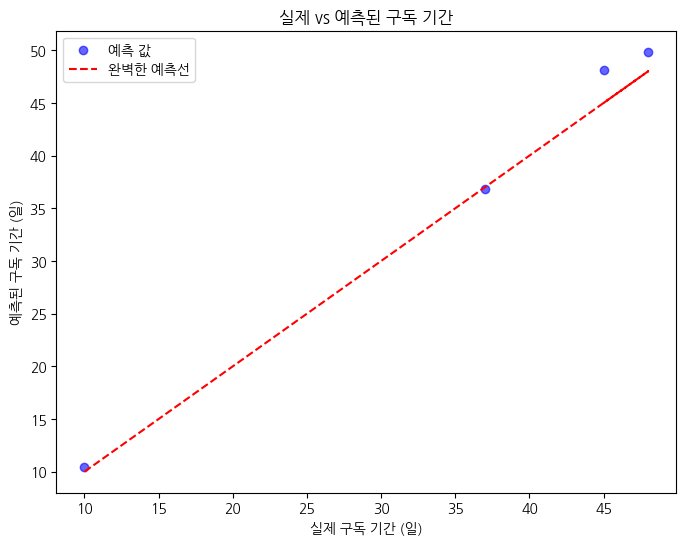

예측된 구독 기간: 21.03 일


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
#구독기간예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 가상의 신규 구독자 데이터 생성
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'num_logins': [2, 15, 3, 10, 20, 12, 5, 9, 18, 4,
                   8, 11, 6, 13, 22, 14, 7, 10, 19, 5],
    'num_watched_videos': [1, 10, 2, 7, 15, 9, 3, 6, 13, 2,
                            5, 8, 3, 9, 18, 11, 4, 7, 14, 4],
    'avg_watch_time': [5, 40, 8, 30, 60, 35, 12, 28, 50, 6,
                       18, 32, 10, 33, 70, 45, 9, 29, 55, 14],
    'subscription_length': [10, 45, 14, 30, 60, 50, 21, 35, 55, 12,
                            28, 40, 18, 42, 70, 48, 15, 37, 58, 20]  # 타겟 변수
}

df = pd.DataFrame(data)

# 데이터 분할 (독립변수 X, 종속변수 y)
X = df[['age', 'num_logins', 'num_watched_videos', 'avg_watch_time']]
y = df['subscription_length']

# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (회귀 모델의 입력값을 표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#선형 회귀 모델 훈련 및 평가
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)
# 예측 수행
y_pred = model.predict(X_test)
# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# 결과 출력
print(f"MAE (평균 절대 오차): {mae:.2f}")
print(f"MSE (평균 제곱 오차): {mse:.2f}")
print(f"RMSE (제곱근 평균 제곱 오차): {rmse:.2f}")
print(f"R² (결정 계수): {r2:.2f}")

#예측 결과 시각화
# 실제 값 vs 예측 값 비교 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='예측 값')
plt.plot(y_test, y_test, color='red', linestyle='--', label='완벽한 예측선')
plt.xlabel("실제 구독 기간 (일)")
plt.ylabel("예측된 구독 기간 (일)")
plt.title("실제 vs 예측된 구독 기간")
plt.legend()
plt.show()

#예측 예제
# 새로운 고객 데이터 예측
new_customer = np.array([[27, 8, 5, 20]])  # [나이, 로그인 수, 시청한 영상 수, 평균 시청 시간]
new_customer_scaled = scaler.transform(new_customer)

# 예측 결과 출력
predicted_subscription_length = model.predict(new_customer_scaled)
print(f"예측된 구독 기간: {predicted_subscription_length[0]:.2f} 일")


* MAE는 평균 절대 오차로 예측구독기간과 실제구독기간이 평균적으로 1.40만큼 차이가 있다는 의미.
*  MSE는평균 제곱 오차로 3.32는 상대적으로 높은 오차를 나타낼 수 있으며, 큰 예측 오차가 있음을 의미.
* RMSE(Root Mean Squared Error)는 제곱근 평균 제곱 오차로예측구독기간과 실제구독기간의 오차가 대체적으로 1.82정도라는 의미.
* R²결정계수는 0.99로 실제구독 기간과 예측 구독 기간의 차이가 매우 적어 모델의 예측 정확도가 매우 좋은 성능을 보임.
* 예측된 구독 기간: 21.03 일

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


모델 정확도: 0.75
혼동 행렬:
[[1 0 0]
 [1 1 0]
 [0 0 1]]
분류 보고서:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



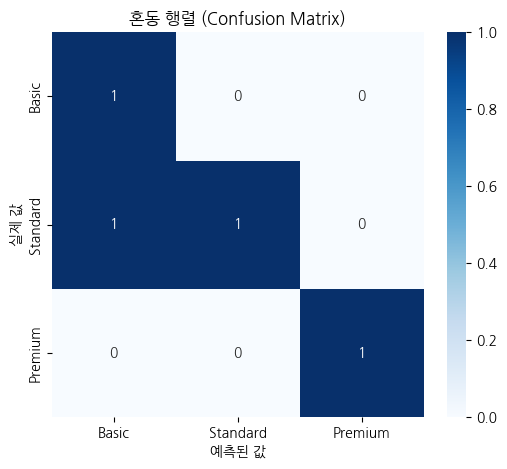

예측된 구독 플랜: 베이직
각 구독 플랜 선택 확률: 베이직=0.63, 스탠다드=0.36, 프리미엄=0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
#고객 활동 기반 구독 플랜 추천 (다중 클래스 예측)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 가상의 고객 구독 플랜 데이터 생성
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'num_logins': [2, 15, 3, 10, 20, 12, 5, 9, 18, 4,
                   8, 11, 6, 13, 22, 14, 7, 10, 19, 5],
    'num_watched_videos': [1, 10, 2, 7, 15, 9, 3, 6, 13, 2,
                            5, 8, 3, 9, 18, 11, 4, 7, 14, 4],
    'avg_watch_time': [5, 40, 8, 30, 60, 35, 12, 28, 50, 6,
                       18, 32, 10, 33, 70, 45, 9, 29, 55, 14],
    'subscription_plan': [0, 1, 0, 1, 2, 1, 0, 1, 2, 0,
                          1, 1, 0, 1, 2, 1, 0, 1, 2, 0]  # 다중 클래스 (0=베이직, 1=스탠다드, 2=프리미엄)
}

df = pd.DataFrame(data)

# 데이터 분할 (독립변수 X, 종속변수 y)
X = df[['age', 'num_logins', 'num_watched_videos', 'avg_watch_time']]
y = df['subscription_plan']

# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화 (로지스틱 회귀는 입력 스케일에 민감)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#다중 클래스 로지스틱 회귀 모델 훈련 및 평가
# 다중 클래스 로지스틱 회귀 모델 생성 (Softmax Regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f"모델 정확도: {accuracy:.2f}")
print("혼동 행렬:")
print(conf_matrix)
print("분류 보고서:")
print(report)

#시각화: 혼동 행렬
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Basic', 'Standard', 'Premium'], yticklabels=['Basic', 'Standard', 'Premium'])
plt.xlabel("예측된 값")
plt.ylabel("실제 값")
plt.title("혼동 행렬 (Confusion Matrix)")
plt.show()

# 새로운 고객 데이터 예측
new_customer = np.array([[27, 8, 5, 20]])  # [나이, 로그인 수, 시청한 영상 수, 평균 시청 시간]
new_customer_scaled = scaler.transform(new_customer)

# 예측 결과 출력
predicted_plan = model.predict(new_customer_scaled)[0] #예측된값중 첫번째가져옴
predicted_proba = model.predict_proba(new_customer_scaled) #스케일링: 모델이 훈련된 데이터와 같은 방식으로 새로운 데이터를 처리하기 위해, 입력 데이터를 **StandardScaler**로 정규화.
                                                           # 훈련된 스케일러를 사용해 새로운 데이터 변환

plan_names = {0: "베이직", 1: "스탠다드", 2: "프리미엄"}
print(f"예측된 구독 플랜: {plan_names[predicted_plan]}")
print(f"각 구독 플랜 선택 확률: 베이직={predicted_proba[0][0]:.2f}, 스탠다드={predicted_proba[0][1]:.2f}, 프리미엄={predicted_proba[0][2]:.2f}")



* 모델의 정확도가 75%라는 것은 전체 4개중 3개만 맞춘 것으로 전체적으로 좋은 성능이나, 각 클래스의 성능차이를 감안할 필요있음.
* 베이직 클래스에서 실제 베이직을 100% 올바르게 예측
* 스탠다드 클래스에서 실제 스탠다드를 올바르게 예측했으나 베이직으로도 예측함. 실제 스탠다의 50%만 올바르게 예측.
*이는 모델이 구독 유형을 더 넓은 범위로 예측하고 있다는 뜻임.
* 프리미엄 클래스는 실제 프리미엄을 100% 올바르게 예측.
* 베이직 클래스의 정밀도는 0.5로 실제 예측한 것 중 50%만 베이직 구독임.
* 스탠다드와 프리미엄의 정밀도는 모두 1로 예측의 100%가 실제 구독 플랜임.




In [16]:
# 고객 충성도 등급 예측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 가상의 고객 데이터 생성
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'monthly_purchases': [1, 5, 2, 3, 6, 4, 2, 3, 5, 1, 3, 4, 2, 4, 6, 5, 2, 3, 5, 2],
    'monthly_spending': [50, 300, 80, 200, 400, 250, 100, 220, 380, 60, 180, 240, 90, 270, 420, 320, 75, 230, 390, 110],
    'customer_support_calls': [3, 1, 4, 2, 0, 1, 3, 2, 0, 4, 2, 1, 3, 1, 0, 1, 4, 2, 0, 3],
    'loyalty_level': [0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0]  # 0=낮음, 1=중간, 2=높음
}

df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(y) 분리
X = df[['age', 'monthly_purchases', 'monthly_spending', 'customer_support_calls']]
y = df['loyalty_level']

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다중 클래스 로지스틱 회귀 모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 예측 함수 정의
def predict_loyalty(age, monthly_purchases, monthly_spending, customer_support_calls):
    """ 입력값을 받아 고객 충성도 등급을 예측 """
    input_data = np.array([[age, monthly_purchases, monthly_spending, customer_support_calls]])
    input_scaled = scaler.transform(input_data)

    predicted_class = model.predict(input_scaled)[0]
    predicted_proba = model.predict_proba(input_scaled)

    loyalty_labels = {0: "낮음", 1: "중간", 2: "높음"}

    print(f"\n🔹 예측된 고객 충성도 등급: {loyalty_labels[predicted_class]}")
    print(f"🔹 각 등급 확률: 낮음={predicted_proba[0][0]:.2f}, 중간={predicted_proba[0][1]:.2f}, 높음={predicted_proba[0][2]:.2f}")

# 예측 예제 실행
predict_loyalty(30, 4, 200, 2)  # 나이=30, 월 평균 구매=4회, 월 평균 구매액=200, 고객센터 문의=2회



🔹 예측된 고객 충성도 등급: 중간
🔹 각 등급 확률: 낮음=0.21, 중간=0.73, 높음=0.06


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
